In [16]:
library(party)
library(FSelector)

1- Upload data to R and view the structure of data, dimensionality, and attribute names

In [17]:

#load the data and explore it

breast <- read.csv('C3.csv')
head(breast)


,Case..,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,car,524.7941,0.1874484,0.03211406,228.8002,6843.598,29.91080,60.20488,220.73721,556.8283
2,2,car,330.0000,0.2268928,0.26529005,121.1542,3163.239,26.10920,69.71736,99.08496,400.2258
3,3,car,551.8793,0.2324779,0.06352998,264.8049,11888.392,44.89490,77.79330,253.78530,656.7694
4,4,car,380.0000,0.2408554,0.28623400,137.6401,5402.171,39.24852,88.75845,105.19857,493.7018
5,5,car,362.8313,0.2007129,0.24434610,124.9126,3290.462,26.34213,69.38939,103.86655,424.7965
6,6,car,389.8730,0.1500983,0.09773844,118.6258,2475.557,20.86862,49.75715,107.68616,429.3858


In [18]:
head(breast)
str(breast)
summary(breast)
dim(breast)
names(breast)
nrow(breast) 
ncol(breast)


,Case..,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,car,524.7941,0.1874484,0.03211406,228.8002,6843.598,29.91080,60.20488,220.73721,556.8283
2,2,car,330.0000,0.2268928,0.26529005,121.1542,3163.239,26.10920,69.71736,99.08496,400.2258
3,3,car,551.8793,0.2324779,0.06352998,264.8049,11888.392,44.89490,77.79330,253.78530,656.7694
4,4,car,380.0000,0.2408554,0.28623400,137.6401,5402.171,39.24852,88.75845,105.19857,493.7018
5,5,car,362.8313,0.2007129,0.24434610,124.9126,3290.462,26.34213,69.38939,103.86655,424.7965
6,6,car,389.8730,0.1500983,0.09773844,118.6258,2475.557,20.86862,49.75715,107.68616,429.3858


'data.frame':	106 obs. of  11 variables:
 $ Case..: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Class : chr  "car" "car" "car" "car" ...
 $ I0    : num  525 330 552 380 363 ...
 $ PA500 : num  0.187 0.227 0.232 0.241 0.201 ...
 $ HFS   : num  0.0321 0.2653 0.0635 0.2862 0.2443 ...
 $ DA    : num  229 121 265 138 125 ...
 $ Area  : num  6844 3163 11888 5402 3290 ...
 $ A.DA  : num  29.9 26.1 44.9 39.2 26.3 ...
 $ Max.IP: num  60.2 69.7 77.8 88.8 69.4 ...
 $ DR    : num  220.7 99.1 253.8 105.2 103.9 ...
 $ P     : num  557 400 657 494 425 ...


     Case..          Class                 I0             PA500        
 Min.   :  1.00   Length:106         Min.   : 103.0   Min.   :0.01239  
 1st Qu.: 27.25   Class :character   1st Qu.: 250.0   1st Qu.:0.06741  
 Median : 53.50   Mode  :character   Median : 384.9   Median :0.10542  
 Mean   : 53.50                      Mean   : 784.3   Mean   :0.12013  
 3rd Qu.: 79.75                      3rd Qu.:1488.0   3rd Qu.:0.16960  
 Max.   :106.00                      Max.   :2800.0   Max.   :0.35832  
      HFS                 DA               Area                A.DA        
 Min.   :-0.06632   Min.   :  19.65   Min.   :    70.43   Min.   :  1.596  
 1st Qu.: 0.04398   1st Qu.:  53.85   1st Qu.:   409.65   1st Qu.:  8.180  
 Median : 0.08657   Median : 120.78   Median :  2219.58   Median : 16.134  
 Mean   : 0.11469   Mean   : 190.57   Mean   :  7335.16   Mean   : 23.474  
 3rd Qu.: 0.16650   3rd Qu.: 255.33   3rd Qu.:  7615.20   3rd Qu.: 30.953  
 Max.   : 0.46775   Max.   :1063.44   Ma

[1] 106  11

[1] "Case.." "Class"  "I0"     "PA500"  "HFS"    "DA"     "Area"   "A.DA"  
 [9] "Max.IP" "DR"     "P"

[1] 106

[1] 11

2- Explain what attributes you are using for clustering and why?

In [19]:
#Data preparation
#Prepare data by remove the output attribute because clustering is an unsupervised approach and remove other unnecessary attributes
#Therefore, We will use the following attributes
data1=breast[,c(-2,-8)]
head(data1)


,Case..,I0,PA500,HFS,DA,Area,Max.IP,DR,P
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,524.7941,0.1874484,0.03211406,228.8002,6843.598,60.20488,220.73721,556.8283
2,2,330.0000,0.2268928,0.26529005,121.1542,3163.239,69.71736,99.08496,400.2258
3,3,551.8793,0.2324779,0.06352998,264.8049,11888.392,77.79330,253.78530,656.7694
4,4,380.0000,0.2408554,0.28623400,137.6401,5402.171,88.75845,105.19857,493.7018
5,5,362.8313,0.2007129,0.24434610,124.9126,3290.462,69.38939,103.86655,424.7965
6,6,389.8730,0.1500983,0.09773844,118.6258,2475.557,49.75715,107.68616,429.3858


Q3 - apply kmeans clustering algorithm using different k values (number of clusters)

In [20]:


# k=2  
K2 = kmeans(data1,2)
K2


# k=3  
K3 = kmeans(data1,3)
K3

# k=4  
K4 = kmeans(data1,4)
K4

# k=5  
K5 = kmeans(data1,5)
K5

K-means clustering with 2 clusters of sizes 105, 1

Cluster means:
     Case..        I0     PA500       HFS        DA       Area    Max.IP
1  53.02857  766.9588 0.1193669 0.1138017  182.2556   5743.295  72.11168
2 103.00000 2600.0000 0.2005383 0.2080432 1063.4414 174480.476 418.68729
        DR         P
1 158.9883  792.9815
2 977.5524 2664.5836

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1

Within cluster sum of squares by cluster:
[1] 8165850496          0
 (between_SS / total_SS =  77.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 3 clusters of sizes 1, 98, 7

Cluster means:
     Case..        I0      PA500       HFS        DA       Area    Max.IP
1 103.00000 2600.0000 0.20053833 0.2080432 1063.4414 174480.476 418.68729
2  49.83673  652.5595 0.12163304 0.1059945  156.6198   3724.338  57.05957
3  97.71429 2368.5486 0.08764046 0.2231029  541.1561  34008.699 282.84114
        DR         P
1 977.5524 2664.5836
2 140.1871  670.1946
3 422.2044 2511.9980

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 3 3 3 2 3 1 2 2 3

Within cluster sum of squares by cluster:
[1]          0 1919577053  211041130
 (between_SS / total_SS =  94.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

K-means clustering with 4 clusters of sizes 76, 7, 1, 22

Cluster means:
     Case..       I0      PA500       HFS        DA       Area   Max.IP
1  46.77632  479.915 0.11573438 0.1040202  107.9084   1672.164  40.3557
2  97.71429 2368.549 0.08764046 0.2231029  541.1561  34008.699 282.8411
3 103.00000 2600.000 0.20053833 0.2080432 1063.4414 174480.476 418.6873
4  60.40909 1248.968 0.14201023 0.1128146  324.8956  10813.664 114.7638
         DR         P
1  95.37471  495.7376
2 422.20435 2511.9980
3 977.55237 2664.5836
4 294.99364 1272.8642

Clustering vector:
  [1] 4 1 4 1 1 1 1 1 4 1 4 4 1 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1
 [75] 1 1 1 1 1 4 4 1 4 4 4 1 2 1 4 1 4 2 4 4 4 4 1 2 2 2 4 2 3 4 1 2

Within cluster sum of squares by cluster:
[1] 283366346 211041130         0 188479959
 (between_SS / total_SS =  98.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"  

K-means clustering with 5 clusters of sizes 26, 7, 1, 16, 56

Cluster means:
     Case..        I0      PA500        HFS        DA        Area    Max.IP
1  46.57692  918.6104 0.14613630 0.15014223  232.9645   5102.8098  76.38174
2  97.71429 2368.5486 0.08764046 0.22310294  541.1561  34008.6985 282.84114
3 103.00000 2600.0000 0.20053833 0.20804325 1063.4414 174480.4762 418.68729
4  69.68750 1413.6294 0.12875612 0.10332750  353.0043  12033.0950 125.95457
5  45.67857  311.5873 0.10822136 0.08625932   65.0642    710.4019  28.40428
         DR         P
1 212.95125  935.8881
2 422.20435 2511.9980
3 977.55237 2664.5836
4 318.25029 1432.1512
5  55.52859  329.1350

Clustering vector:
  [1] 1 1 4 1 1 5 5 5 1 1 4 4 1 1 1 4 5 1 1 1 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 [38] 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 4 1 1
 [75] 1 5 5 5 1 4 1 1 4 4 4 1 2 5 4 1 4 2 4 1 4 4 1 2 2 2 4 2 3 4 1 2

Within cluster sum of squares by cluster:
[1]  94822417 211041130         0  9316344

4- Plot the model and show the centroids for each K selected in the previous question

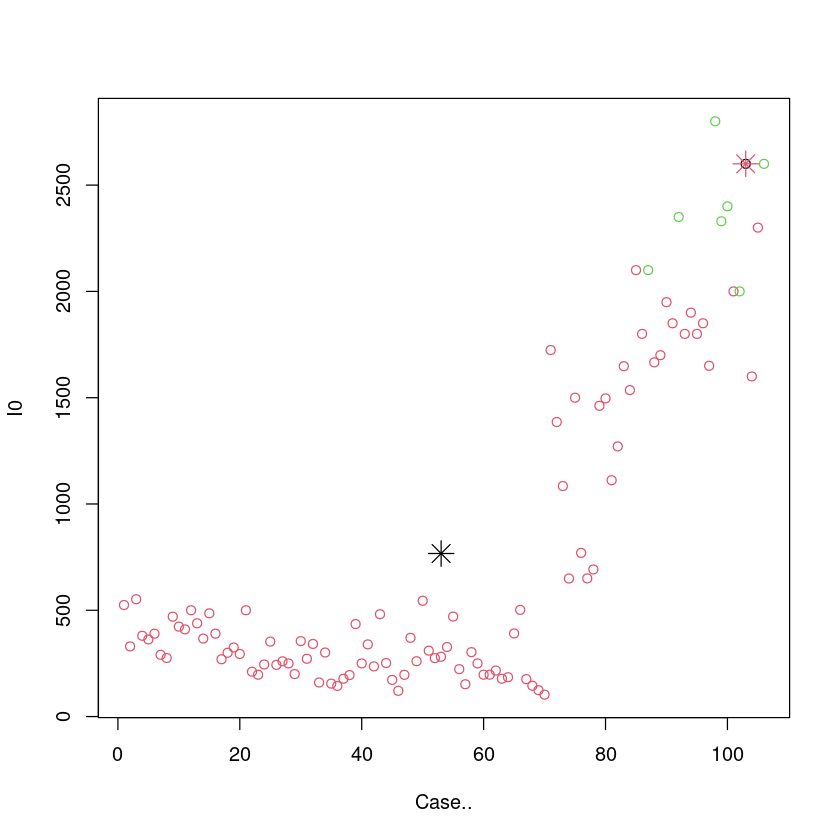

In [21]:
#k2 model
plot(data1[c(1,2)], col = K3$cluster)
points(K2$centers[,c(1,2)], col = 1:3,  pch = 8, cex=2)

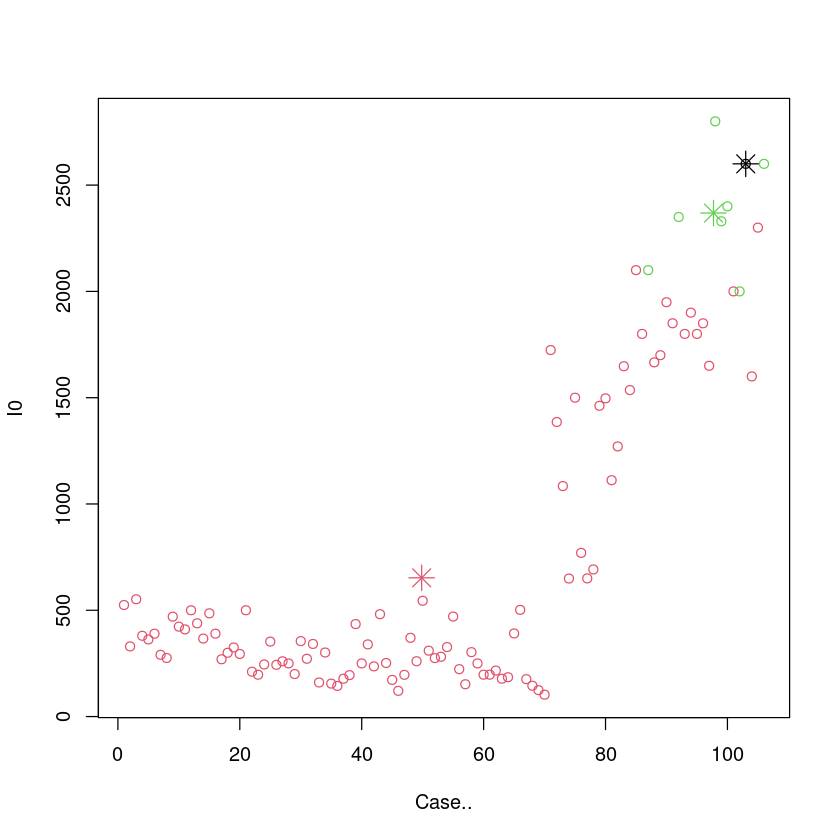

In [22]:
#k3 model
plot(data1[c(1,2)], col = K3$cluster)
points(K3$centers[,c(1,2)], col = 1:3,  pch = 8, cex=2)


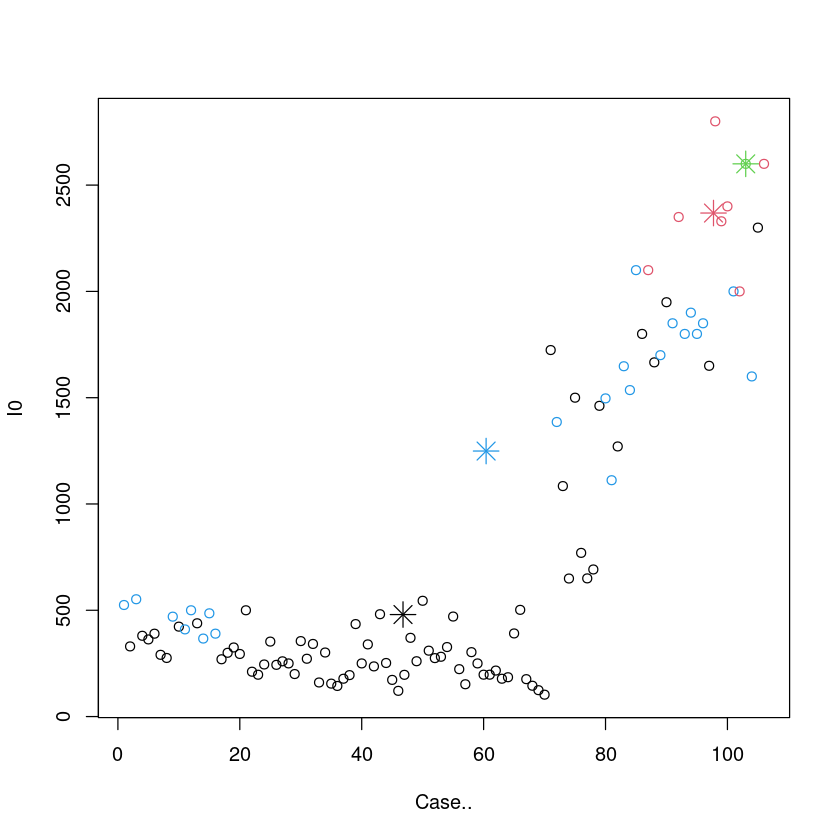

In [23]:
#k4 model
plot(data1[c(1,2)], col = K4$cluster)
points(K4$centers[,c(1,2)], col = 1:4,  pch = 8, cex=2)

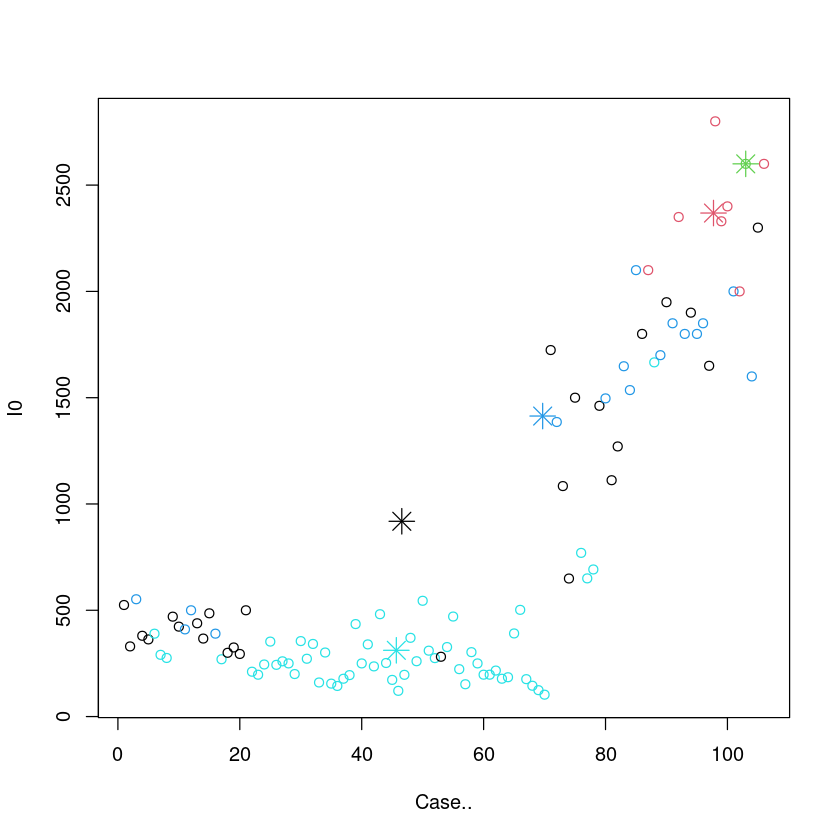

In [24]:
# k5 model
plot(data1[c(1,2)], col = K5$cluster)
points(K5$centers[,c(1,2)], col = 1:5,  pch = 8, cex=2)

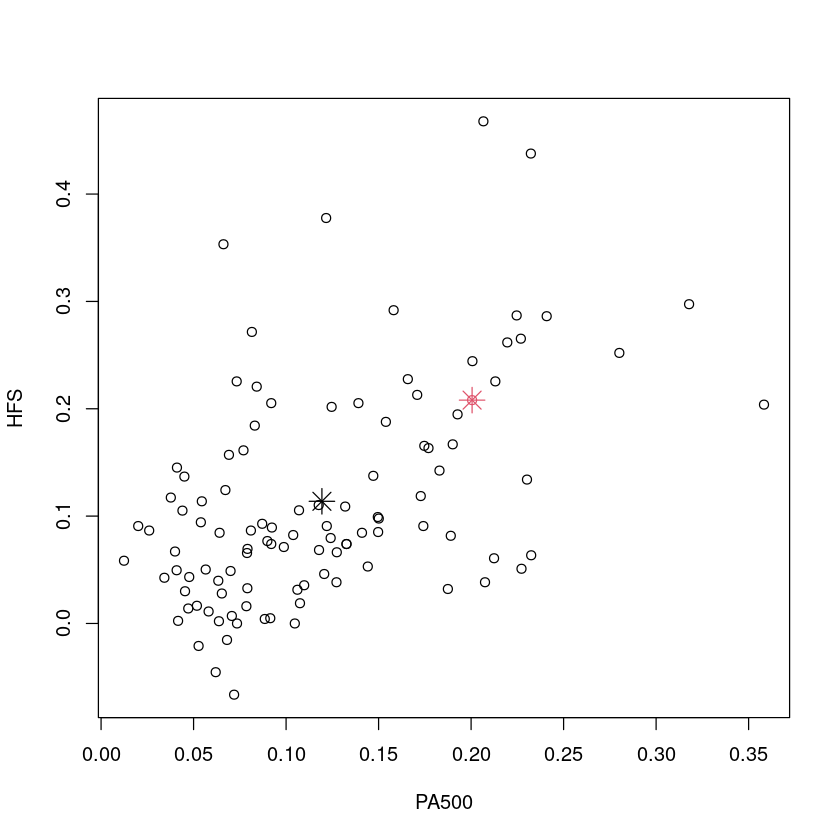

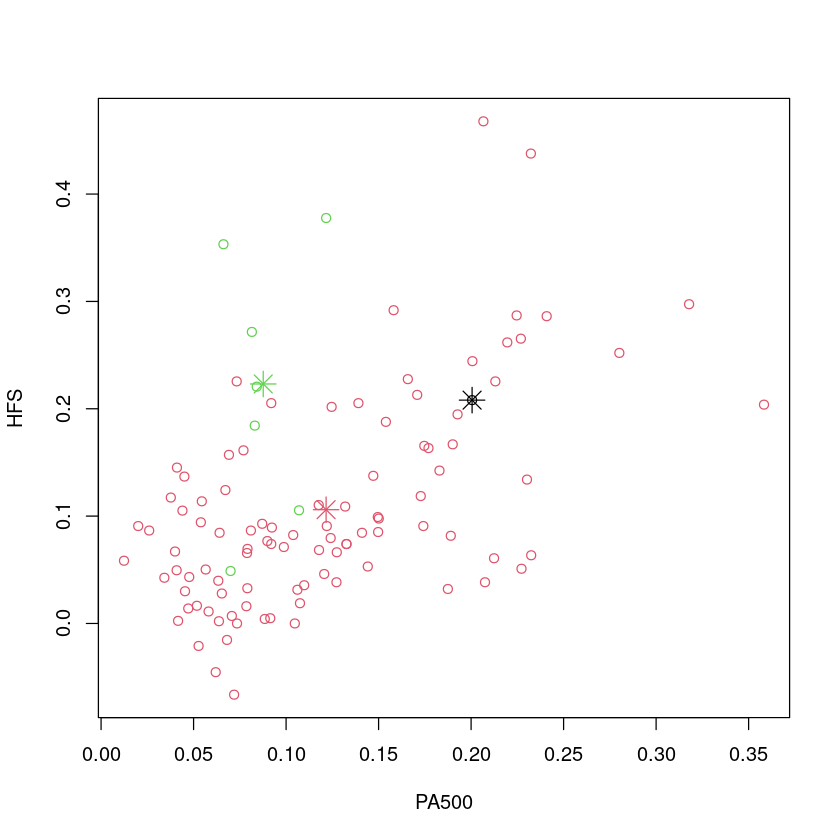

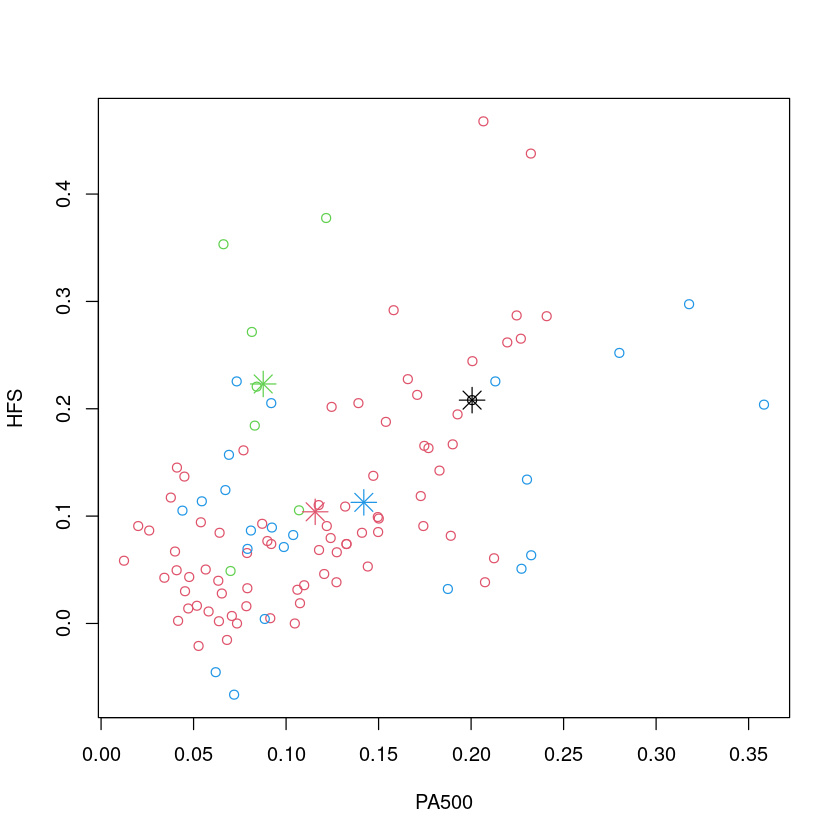

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): argument "x" is missing, with no default


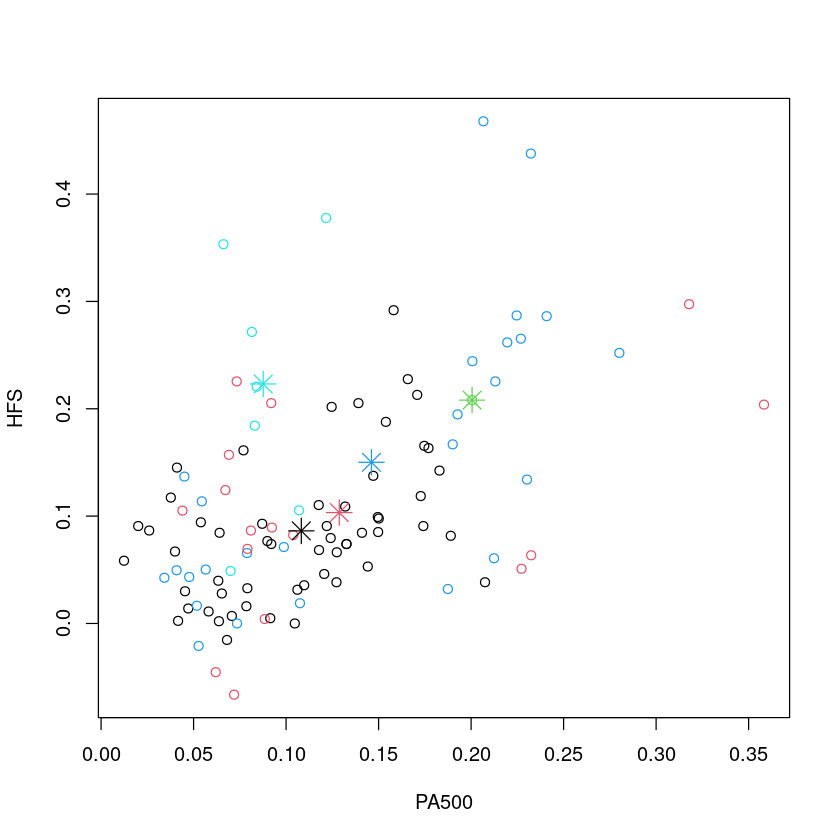

In [10]:
#based on features 3 and 4
#K2 model
plot(data1[c(3,4)], col = K2$cluster)
points(K2$centers[,c(3,4)], col = 1:2,  pch = 8, cex=2)

#k3 model
plot(data1[c(3,4)], col = K3$cluster)
points(K3$centers[,c(3,4)], col = 1:3,  pch = 8, cex=2)

#k4 model
plot(data1[c(3,4)], col = K4$cluster)
points(K4$centers[,c(3,4)], col = 1:4,  pch = 8, cex=2)

#k5 model
plot(data1[c(3,4)], col = K5$cluster)
points(K5$centers[,c(3,4)], col = 1:5,  pch = 8, cex=2)

plot(data1.col = K3$cluster)

5- Select different attributes and show which ones show good clusters


In [25]:

#Features selection
head(breast)
data2=breast[,c(-1)]
head(data2)

data2$Type=as.factor(data2$Class)
str(data2)

,Case..,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,car,524.7941,0.1874484,0.03211406,228.8002,6843.598,29.91080,60.20488,220.73721,556.8283
2,2,car,330.0000,0.2268928,0.26529005,121.1542,3163.239,26.10920,69.71736,99.08496,400.2258
3,3,car,551.8793,0.2324779,0.06352998,264.8049,11888.392,44.89490,77.79330,253.78530,656.7694
4,4,car,380.0000,0.2408554,0.28623400,137.6401,5402.171,39.24852,88.75845,105.19857,493.7018
5,5,car,362.8313,0.2007129,0.24434610,124.9126,3290.462,26.34213,69.38939,103.86655,424.7965
6,6,car,389.8730,0.1500983,0.09773844,118.6258,2475.557,20.86862,49.75715,107.68616,429.3858


,Class,I0,PA500,HFS,DA,Area,A.DA,Max.IP,DR,P
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,car,524.7941,0.1874484,0.03211406,228.8002,6843.598,29.91080,60.20488,220.73721,556.8283
2,car,330.0000,0.2268928,0.26529005,121.1542,3163.239,26.10920,69.71736,99.08496,400.2258
3,car,551.8793,0.2324779,0.06352998,264.8049,11888.392,44.89490,77.79330,253.78530,656.7694
4,car,380.0000,0.2408554,0.28623400,137.6401,5402.171,39.24852,88.75845,105.19857,493.7018
5,car,362.8313,0.2007129,0.24434610,124.9126,3290.462,26.34213,69.38939,103.86655,424.7965
6,car,389.8730,0.1500983,0.09773844,118.6258,2475.557,20.86862,49.75715,107.68616,429.3858


'data.frame':	106 obs. of  11 variables:
 $ Class : chr  "car" "car" "car" "car" ...
 $ I0    : num  525 330 552 380 363 ...
 $ PA500 : num  0.187 0.227 0.232 0.241 0.201 ...
 $ HFS   : num  0.0321 0.2653 0.0635 0.2862 0.2443 ...
 $ DA    : num  229 121 265 138 125 ...
 $ Area  : num  6844 3163 11888 5402 3290 ...
 $ A.DA  : num  29.9 26.1 44.9 39.2 26.3 ...
 $ Max.IP: num  60.2 69.7 77.8 88.8 69.4 ...
 $ DR    : num  220.7 99.1 253.8 105.2 103.9 ...
 $ P     : num  557 400 657 494 425 ...
 $ Type  : Factor w/ 6 levels "adi","car","con",..: 2 2 2 2 2 2 2 2 2 2 ...


6- Find the most important attributes using information gain of gain ration 

In [28]:
topf <- gain.ratio(Class ~ ., data2)
topf

,attr_importance
,<dbl>
I0,0.7353248
PA500,0.5254016
HFS,0.2695209
DA,0.5740922
Area,0.6519038
A.DA,0.5783129
Max.IP,0.6067863
DR,0.4736803
P,0.6980094


In [29]:
model <- ctree(I0 ~ PA500 + DA + Area ,data = data2)
model


	 Conditional inference tree with 8 terminal nodes

Response:  I0 
Inputs:  PA500, DA, Area 
Number of observations:  106 

1) DA <= 264.8049; criterion = 1, statistic = 70.534
  2) DA <= 118.6258; criterion = 1, statistic = 19.648
    3) PA500 <= 0.07853982; criterion = 0.99, statistic = 8.629
      4)*  weights = 15 
    3) PA500 > 0.07853982
      5) DA <= 54.58308; criterion = 1, statistic = 28.319
        6) DA <= 29.63751; criterion = 0.967, statistic = 6.442
          7)*  weights = 7 
        6) DA > 29.63751
          8)*  weights = 15 
      5) DA > 54.58308
        9)*  weights = 15 
  2) DA > 118.6258
    10) PA500 <= 0.09232792; criterion = 0.999, statistic = 12.287
      11)*  weights = 10 
    10) PA500 > 0.09232792
      12)*  weights = 19 
1) DA > 264.8049
  13) Area <= 15021.55; criterion = 0.987, statistic = 8.176
    14)*  weights = 15 
  13) Area > 15021.55
    15)*  weights = 10 

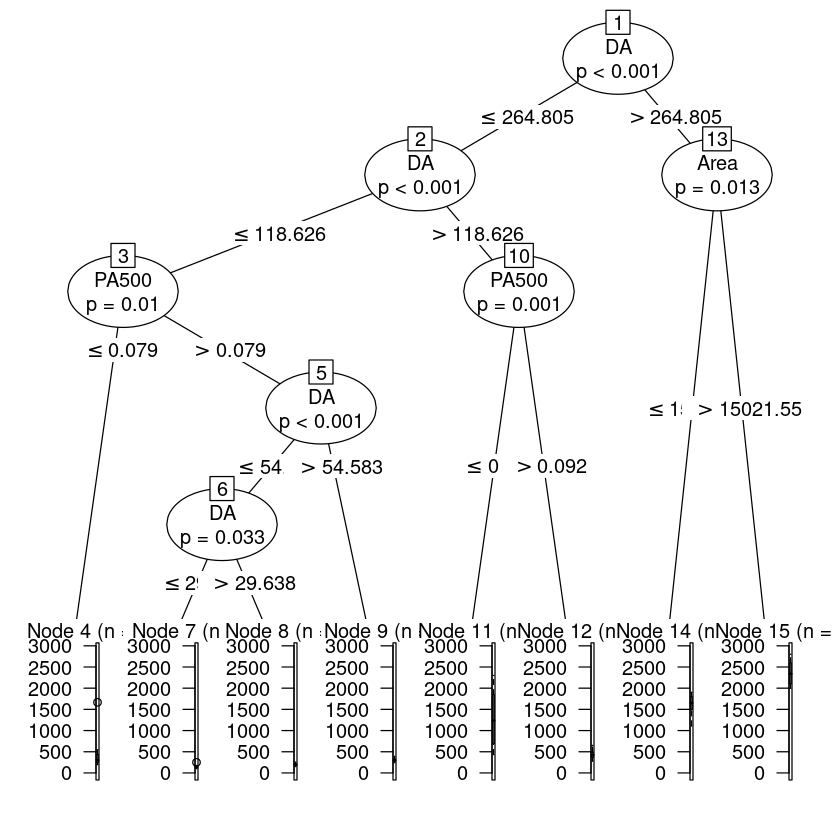

In [30]:


#plot
plot(model)